In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
import tensorflow as tf

tf.nn.lrn

<function tensorflow.python.ops.gen_nn_ops.lrn>

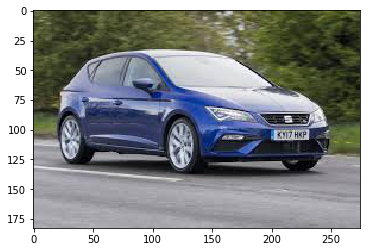

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#Jupyterでインライン表示するための宣言
%matplotlib inline 

#画像の読み込み
test = Image.open("./car1.jpg")

# gray_img = im.convert('L')
# test = test.resize((32,32))
plt.imshow(test)


rotation_range=90


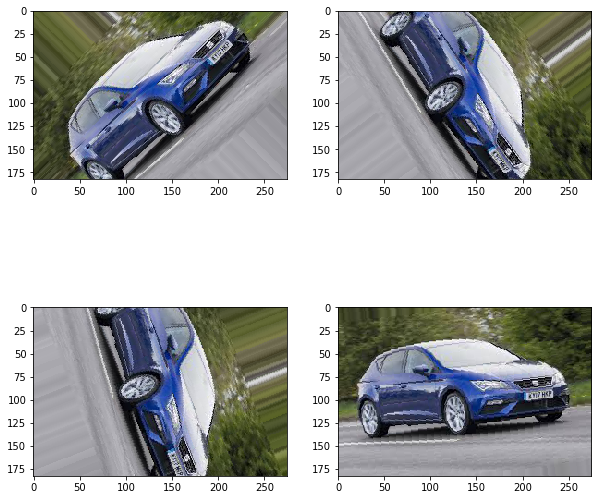

width_shift_range=0.2


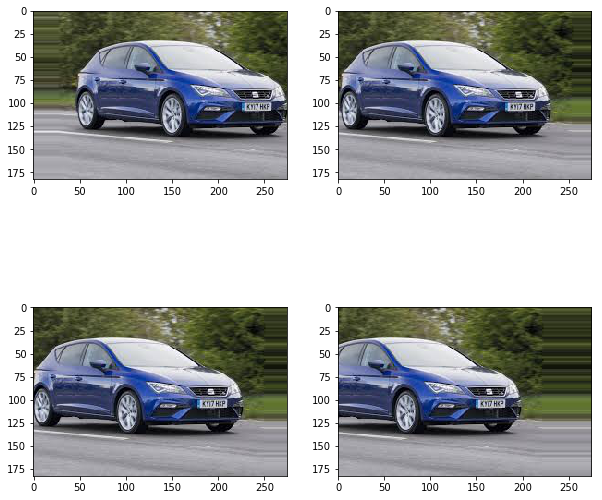

height_shift_rang


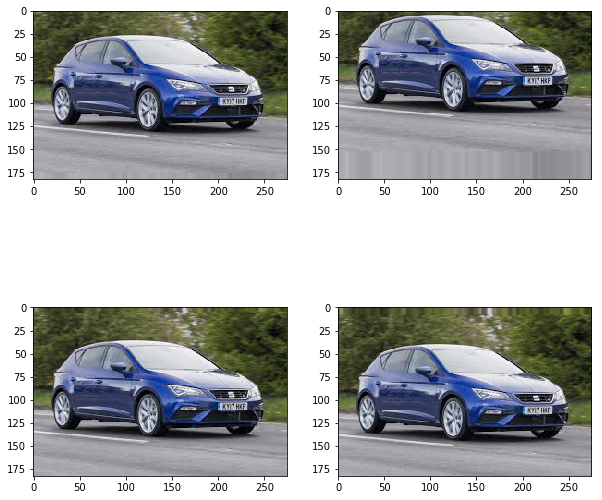

shear_range


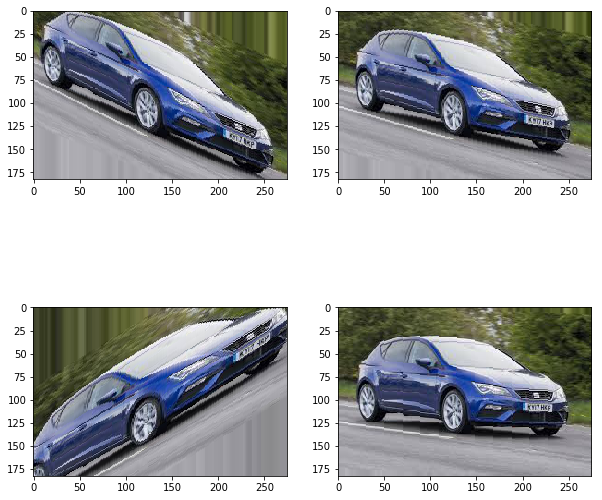

zoom_range


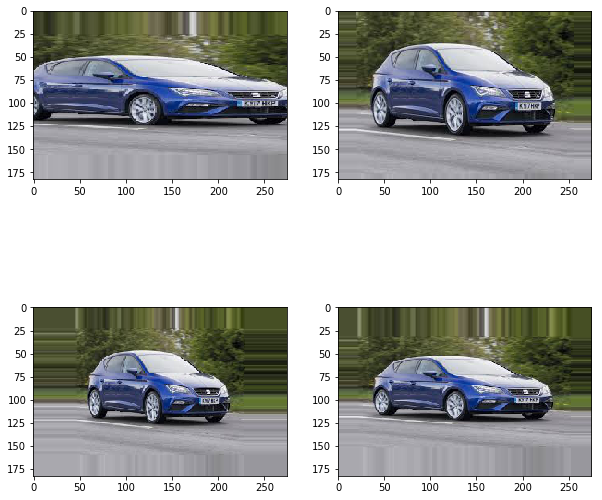

channel_shift_range


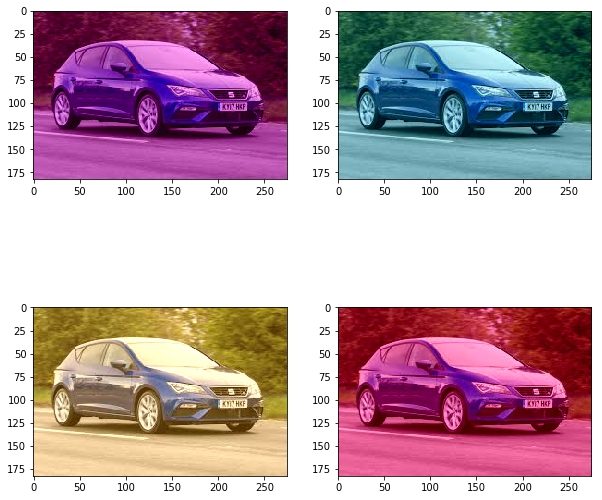

horizontal_flip


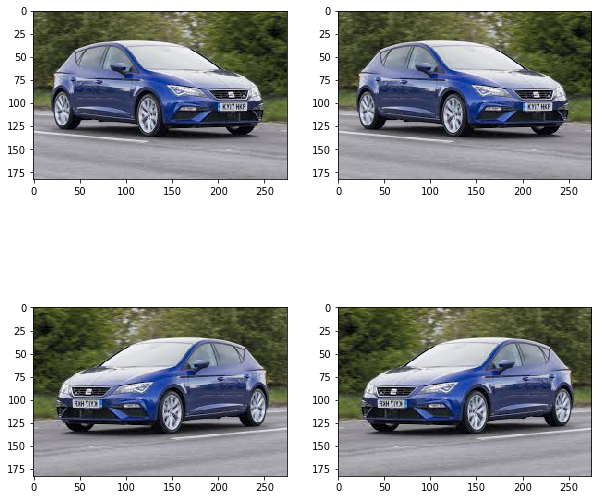

vertical_flip


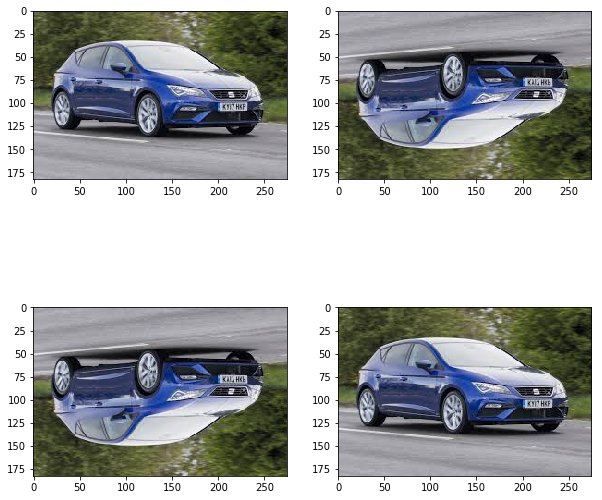

smplewise_center


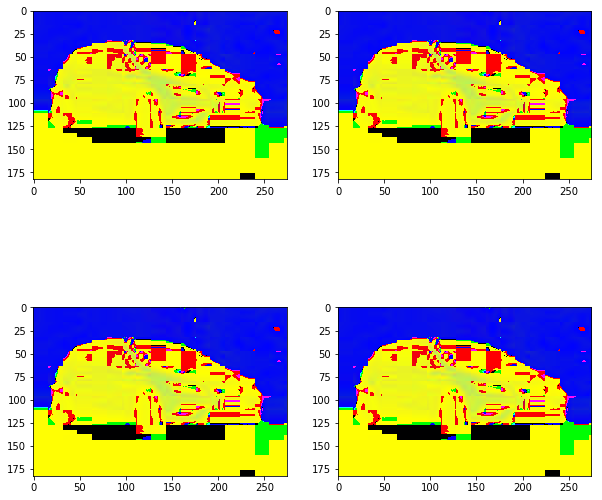

samplewise_std_normalization


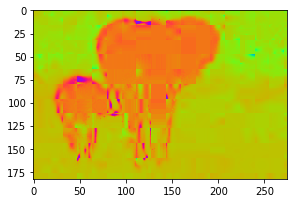

In [32]:
x = np.array(test)

x = np.expand_dims(x, axis=0)

# datagen = ImageDataGenerator(rotation_range=90)



def plot_sample(g,x):
    g = datagen.flow(x, batch_size=1)
    plt.figure(figsize=(10,10))
    for i in range(4):
        batch = g.next()
        plt.subplot(2,2,i+1)
        plt.imshow(batch[0]/255)
    plt.show()


print('rotation_range=90')
datagen = ImageDataGenerator(rotation_range=90)
plot_sample(datagen, x)

print('width_shift_range=0.2')
datagen = ImageDataGenerator(width_shift_range=0.2)
plot_sample(datagen, x)

print('height_shift_rang')
datagen = ImageDataGenerator(height_shift_range=0.2)
plot_sample(datagen, x)

print('shear_range')
datagen = ImageDataGenerator(shear_range=0.78)
plot_sample(datagen, x)

print('zoom_range')
datagen = ImageDataGenerator(zoom_range=0.5)
plot_sample(datagen, x)

print('channel_shift_range')
datagen = ImageDataGenerator(channel_shift_range=100)
plot_sample(datagen, x)

print('horizontal_flip')
datagen = ImageDataGenerator(horizontal_flip=True)
plot_sample(datagen, x)

print('vertical_flip')
datagen = ImageDataGenerator(vertical_flip=True)
plot_sample(datagen, x)

print('smplewise_center')
datagen = ImageDataGenerator(samplewise_center=True)
plot_sample(datagen, x)


x = np.array(Image.open("elephant.jpg"))
x = np.expand_dims(x, axis=0)

print('samplewise_std_normalization')
datagen = ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True)

from scipy.misc import toimage
g = datagen.flow(x, batch_size=1)
plt.figure(figsize=(10,10))
for i in range(1):
    batch = g.next()
    pilImg = Image.fromarray(np.uint8(batch[0]))
    pilImg.save('testcar.jpg')
    img = toimage(batch[0])
    plt.subplot(2,2,i+1)
    plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.show()

# plt.figure
# print(np.array(img))
# print(X_batch[0]*255 + 255/2)
# plt.imshow(img)
# plt.show()

# plt.imshow(X_batch[0],cmap=plt.get_cmap('gray'))
# plt.show()

zca whitening
(10000, 32, 32, 3)


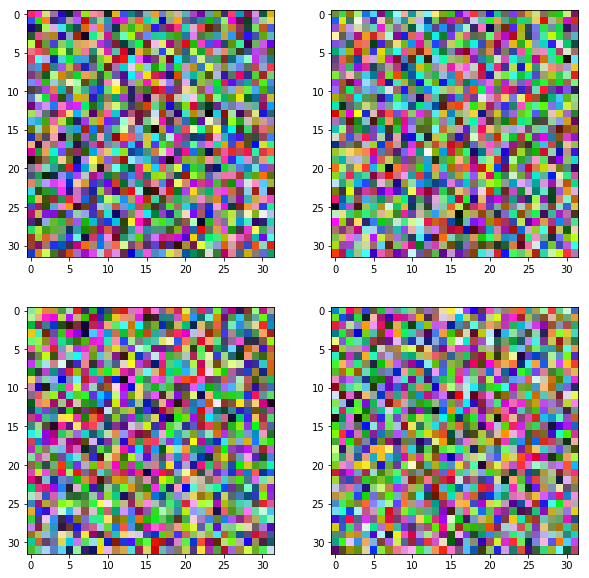

In [14]:
from keras.datasets import cifar10
K.set_image_dim_ordering('tf')
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_test.astype("float32")
x_train /= 255

# x_test = x_test.reshape(x_test.shape[0], 3, 32, 32)
print('zca whitening')
datagen = ImageDataGenerator(zca_whitening=True)
print(x_train.shape)
datagen.fit(x_train)
plot_sample(datagen, x_train)

(16, 32, 32, 3)
(16, 1)


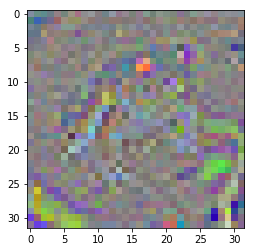

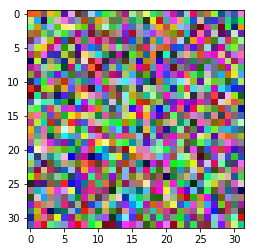

In [33]:
img_rows, img_cols, img_channels = 32, 32, 3
batch_size = 16
nb_classes = 10

# CIFAR-10データをロード
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 画素値を0-1に変換
X_train = X_train.astype('float32')
X_train /= 255.0

# draw(X_train[0:batch_size], 'zca_whitening_before.png')

# データ拡張
datagen = ImageDataGenerator(zca_whitening=True)

datagen.fit(X_train)
g = datagen.flow(X_train, y_train, batch_size, shuffle=False)
X_batch, y_batch = g.next()
print(X_batch.shape)
print(y_batch.shape)

from scipy.misc import toimage
plt.figure
img = toimage(X_batch[0])
# print(np.array(img))
# print(X_batch[0]*255 + 255/2)
plt.imshow(img)
plt.show()

plt.imshow(X_batch[0],cmap=plt.get_cmap('gray'))
plt.show()

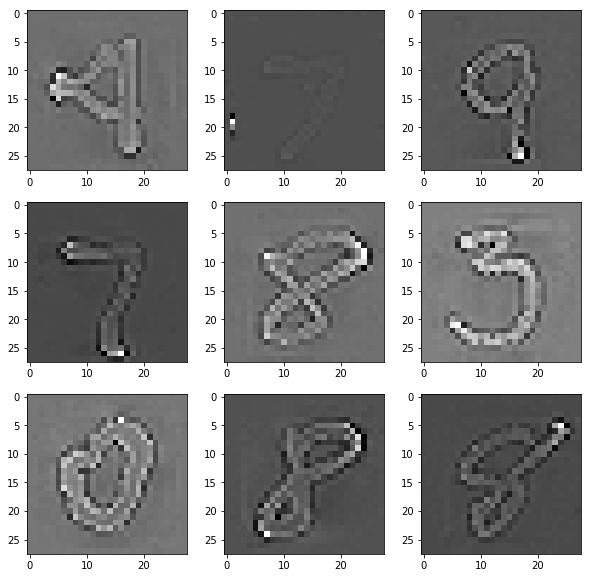

In [43]:
# ZCA whitening
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import backend as K
K.set_image_dim_ordering('th')
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    plt.figure(figsize=(10,10))
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

In [ ]:
class NormLayer(object):
    
    def __init__(self, input, kernel_shape=9, threshold=1e-4, method="lcn"):
        
        input_shape = input.shape
        
        input_shape_X = (input.shape[0]*input.shape[1] , 1 , input.shape[2], input.shape[3])
        X = input.reshape(input_shape_X)
        
        if method=="lcn":
            out = self.lecun_lcn(X, kernel_shape)
        
        self.output = out.reshape(input_shape)
        
        
    
    def lecun_lcn(self, X, kernel_shape, threshold=1e-4):
        """
        Yann LeCun's local contrast normalization
        Orginal code in Theano by: Guillaume Desjardins
        """

        filter_shape = (1, 1, kernel_shape, kernel_shape)
        filters = gaussian_filter(kernel_shape).reshape(filter_shape)
        filters = theano.shared(theano._asarray(filters, dtype=theano.config.floatX), borrow=True)
        
        # 'full' convolution  outputのサイズは  input_shape + filter_shape - 1
        convout = conv.conv2d(input=X,
                              filters=filters,
                              filter_shape=filter_shape,
                              border_mode='full')

        # 各ピクセルから、kernel_size x kernel_size  近傍の平均を減算

        mid = int(numpy.floor(kernel_shape / 2.))
        centered_X = X - convout[:, :, mid:-mid, mid:-mid]

        # kernel_size x kernel_size  近傍の標準偏差で除算
        sum_sqr_XX = conv.conv2d(input=centered_X ** 2,
                                 filters=filters,
                                 filter_shape=filter_shape,
                                 border_mode='full')

        denom = T.sqrt(sum_sqr_XX[:, :, mid:-mid, mid:-mid])
        per_img_mean = denom.mean(axis=[2, 3])
        divisor = T.largest(per_img_mean.dimshuffle(0, 1, 'x', 'x'), denom)
        # 定数c(threshold)で、コントラストが大きい場合のみ標準偏差で除算
        divisor = T.maximum(divisor, threshold)

        new_X = centered_X / divisor

        return new_X


def gaussian_filter(kernel_shape):
    x = numpy.zeros((kernel_shape, kernel_shape),
                    dtype=theano.config.floatX)

    def gauss(x, y, sigma=2.0):
        Z = 2 * numpy.pi * sigma ** 2
        return 1. / Z * numpy.exp(-(x ** 2 + y ** 2) / (2. * sigma ** 2))

    mid = numpy.floor(kernel_shape / 2.)
    for i in xrange(0, kernel_shape):
        for j in xrange(0, kernel_shape):
            x[i, j] = gauss(i - mid, j - mid)

    return x / numpy.sum(x)